## Lab 8: Optimization

The basic components

- The objective function (also called the 'cost' function)


In [1]:
import numpy as np
objective = np.poly1d([1.3, 4.0, 0.6])
print(objective)

     2
1.3 x + 4 x + 0.6


- The optimizer


In [8]:
import scipy.optimize as opt
x_ = opt.fmin(objective, [3])# 3 is the initial guess
print("solution: x={}".format(x_))


Optimization terminated successfully.
         Current function value: -2.476923
         Iterations: 20
         Function evaluations: 40
solution: x=[-1.53845215]


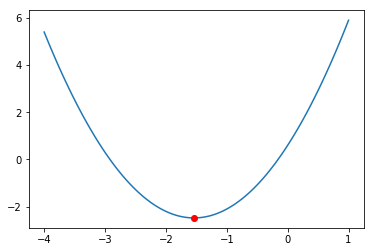

In [47]:
import matplotlib.pyplot as plt

x = np.linspace(-4,1,101)
plt.plot(x, objective(x))
plt.plot(x_, objective(x_), 'ro')
plt.show()

- With bounds

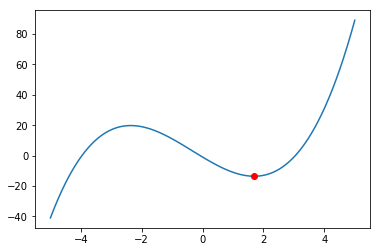

In [10]:
f = lambda x : x ** 3 + x ** 2 - 12 * x - 1
x = np.linspace(- 5, 5, 1000)

plt.plot(x, f(x))

result = opt.minimize_scalar(f, method="bounded", bounds=[0, 4])

f_min = f(result.x)
plt.plot(result.x, f_min,'ro')
plt.show()

### Optimization with constraints

min $x_1x_4(x_1+x_2+x_3)+x_3$
    
such that $x_1 x_2 x_3 x_4 \geq 25$  

$x_1^2 + x_2^2 + x_3^2 + x_4^2 = 40$

$1 \leq x_1, x_2, x_3, x_4 \leq 5$

In [11]:
def objective(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    return x1*x4*(x1+x2+x3) + x3

def constraint1(x):
    return x[0]*x[1]*x[2]*x[3] - 25

def constraint2(x):
    return sum(p**2 for p in x) - 40

In [12]:
x0 = [2,4,4,2]
print(objective(x0))


44


In [13]:
b = (1,5)
bounds = [b,b,b,b]
con1 = {'type':'ineq','fun':constraint1}
con2 = {'type':'eq','fun':constraint2}

cons = [con1, con2]

In [14]:
solution = opt.minimize(objective, x0, bounds= bounds, constraints = cons)
#object is the one we want to minimize, x0 is the initial guess,
# bounds with two types 
# two constraints function

In [15]:
solution

     fun: 17.014017283490524
     jac: array([14.57227612,  1.37940836,  2.37940836,  9.56414986])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([1.        , 4.74299977, 3.82114981, 1.37940832])

### Sympy

In [2]:
import math
from sympy import * #use math symbols in python
init_printing()

In [18]:
math.sqrt(2)


In [21]:
1+ sqrt(2) #sympy let us show the math form

In [24]:
N(1+sqrt(2)) #show the actual number

Symbol represents a mathematical variable

In [25]:
x,y,z = symbols('x,y,z')

In [26]:
sin(x)**2 + cos(x)**2


In [27]:
#right click on the sin^2(x) + cos^2(x), show math as , latex

In [28]:
f = (x**2 + x*y + y**2)

In [29]:
f.diff(x) #differential of f

Hessian: Matrix of second partial derivatives

$H_{i,j} = \frac{\partial^2 f}{\partial x_i \partial x_j}$

In [30]:
fhessian_sym = [[f.diff(u, v) for u in (x, y)] for v in (x, y)]

In [31]:
fhessian_sym

### Implementing a neural network  : Logical OR

| x_1 | x_2 | y   |
|---- | ----| --- |
| 1 | 0 | 1|
| 0 | 1 | 1|
| 1 | 1 | 1|
| 0 | 0 | 0|

In [32]:
data = np.array([[1,0,1],[0,1,1],[1,1,1],[0,0,0]])

In [33]:
X = data[:,0:2]
y = data[:,2].reshape(-1,1)
print(X)
print(y)

[[1 0]
 [0 1]
 [1 1]
 [0 0]]
[[1]
 [1]
 [1]
 [0]]


$y_{pred} = g(w_1 . x) . w_2 $

where $g(z) = \frac{1}{1+e^{-z}}$ is the sigmoid function

In [34]:
def sigmoid(z):

    return 1/(1+np.exp(-z))

In [35]:
class NeuralNetwork:
    def __init__(self,x,y,n):
        self.inputs = x
        self.targets = y
        
        self.w1 = np.random.rand(x.shape[1],n)        
        self.w2 = np.random.rand(n,1)                  
    
    def update(self,theta):
        self.w1 = theta.reshape(3,-1)[:-1,:]
        self.w2 = theta.reshape(3,-1)[-1,:].reshape(-1,1)
        
        return self.cost()
    
    def cost(self):
                
        preds = self.predictions()

        J = np.mean((self.targets - np.array(preds))**2)
        
        return J
    
    def predictions(self):
        preds = []
        for i in self.inputs:
        
            pred = sigmoid(i.dot(self.w1)).dot(self.w2)
            preds.append(pred)
        return preds

net = NeuralNetwork(X,y,2)


In [36]:
def fit(self):
    param_init = np.concatenate([net.w1,net.w2.T]).reshape(-1,)

    res = opt.minimize(net.update,param_init)
    
    return res


In [37]:
fit(net)

      fun: 0.05769292022936854
 hess_inv: array([[ 923502.07801067,  827819.36417482,  907338.0971137 ,
         812711.45723873, -852494.64870501,  852482.12310302],
       [ 827819.36417481,  742052.64251268,  813330.98254246,
         728509.0269097 , -764169.80358821,  764158.92467217],
       [ 907338.09711368,  813330.98254245,  891458.99846546,
         798487.49198921, -837574.41149084,  837562.10003236],
       [ 812711.45723872,  728509.0269097 ,  798487.49198922,
         715214.56736404, -750223.51817879,  750212.84187977],
       [-852494.648705  , -764169.80358821, -837574.41149086,
        -750223.51817879,  786948.42075672, -786936.63566921],
       [ 852482.12310299,  764158.92467215,  837562.10003235,
         750212.84187975, -786936.63566918,  786925.54595397]])
      jac: array([ 9.17352736e-08, -3.61818820e-07,  1.19209290e-07, -4.58210707e-07,
       -8.47503543e-06, -8.43405724e-06])
  message: 'Optimization terminated successfully.'
     nfev: 200
      nit: 24

In [38]:
net.predictions()

[array([0.9230695]),
 array([0.92306778]),
 array([0.92307661]),
 array([0.4615383])]

### Polynomial regression

Relationship between x and y is modelled as a nth degree polynomial

$y = b_0 + b_1x + b_2x^2 +....+ b_nx^n$

In [39]:
x = np.linspace(0,6.28,10)
e = np.random.uniform(low=0,high=0.25,size=10)

yn = np.sin(x) + e

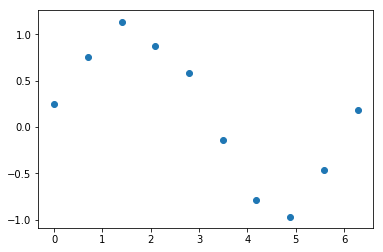

In [40]:
plt.scatter(x,yn)

In [41]:
class PolReg:
    def __init__(self,x,y,d):
        self.inputs = x
        self.targets = y
        
        self.w = np.random.rand(d+1)        
                         
    
    def update(self,theta):
        self.w = theta
        
        return self.cost()
    
    def cost(self):
                
        preds = self.predictions()
        
        J = np.mean((self.targets - np.array(preds))**2)

        return J
    
    def predictions(self,inp=None):
        preds = []
        if inp is None:
            inp = self.inputs
            
        for i in inp:
        
            pred = np.poly1d(self.w)(i)
            preds.append(pred)
            
        return preds

    def fit(self):
        param_init = self.w

        res = opt.minimize(self.update,param_init)

        return res



In [42]:
p2 = PolReg(x,yn,2)
p2.fit()

      fun: 0.2690502700761151
 hess_inv: array([[ 0.03962973, -0.24924336,  0.2320896 ],
       [-0.24924336,  1.69273743, -1.84832383],
       [ 0.2320896 , -1.84832383,  3.08743792]])
      jac: array([-6.33299351e-07, -1.45286322e-07, -3.72529030e-08])
  message: 'Optimization terminated successfully.'
     nfev: 55
      nit: 10
     njev: 11
   status: 0
  success: True
        x: array([ 0.0075148 , -0.26760376,  0.8797585 ])

In [43]:
p3 = PolReg(x,yn,3)
p3.fit()

      fun: 0.013621780048396306
 hess_inv: array([[ 0.01400372, -0.13179121,  0.31329127, -0.11802036],
       [-0.13179121,  1.27950171, -3.19302204,  1.33273954],
       [ 0.31329127, -3.19302204,  8.65651117, -4.40211691],
       [-0.11802036,  1.33273954, -4.40211691,  3.91380588]])
      jac: array([-2.03028321e-07,  1.73132867e-06, -1.15926377e-06, -6.58666249e-06])
  message: 'Optimization terminated successfully.'
     nfev: 78
      nit: 10
     njev: 13
   status: 0
  success: True
        x: array([ 0.08464096, -0.78980427,  1.63224071,  0.15508359])

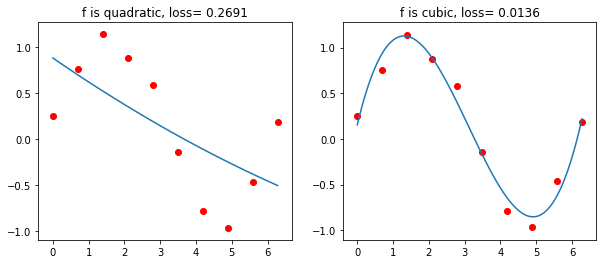

In [45]:
x1 = np.linspace(0,6.28,100)
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(x1,p2.predictions(x1))
plt.scatter(x,yn,c='red')
plt.title(f'f is quadratic, loss= {p2.cost():.4f}')

plt.subplot(122)
plt.plot(x1,p3.predictions(x1))
plt.scatter(x,yn,c='red')
plt.title(f'f is cubic, loss= {p3.cost():.4f}')

plt.show()